In [66]:
from sklearn.datasets import fetch_lfw_people
caras = fetch_lfw_people(min_faces_per_person=50)
print(caras.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']


In [67]:
print(caras.images.shape)

(1560, 62, 47)


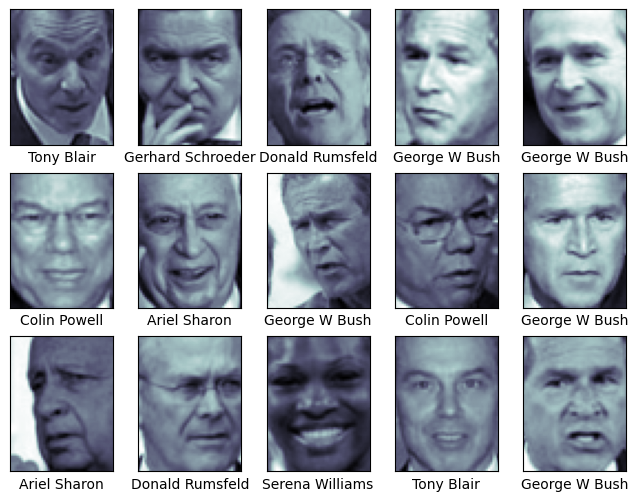

In [68]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 5, figsize=(8, 6))
for i, axi in enumerate(ax.flat):
       axi.imshow(caras.images[i], cmap='bone')
       axi.set(xticks=[], yticks=[], xlabel=caras.target_names[caras.target[i]])

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(caras.data, caras.target, random_state=42)

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_ent_pca = pca.fit_transform(X_train)

In [71]:
pca.components_

array([[-0.00607078, -0.00696135, -0.00824838, ..., -0.01149927,
        -0.0101975 , -0.00895819],
       [ 0.0177825 ,  0.01677462,  0.01681424, ..., -0.03808317,
        -0.03663182, -0.0346052 ],
       [ 0.02953519,  0.02934722,  0.0282512 , ...,  0.0431507 ,
         0.03817452,  0.03403772],
       ...,
       [ 0.0250473 ,  0.01984216,  0.01766246, ..., -0.00135661,
         0.00898388,  0.00990691],
       [-0.01926547, -0.01719586, -0.00918301, ..., -0.0113983 ,
        -0.02506719, -0.02988061],
       [-0.01791455, -0.01387665, -0.0113521 , ...,  0.03094351,
         0.03353771,  0.02220081]], dtype=float32)

In [72]:
#El primer componente representa el 22 % de la varianza por sí solo, seguido de un 18 % adicional para el segundo componente
pca.explained_variance_ratio_

array([0.24344894, 0.1275688 , 0.06751893, 0.05460059, 0.04370031,
       0.02591878, 0.02119704, 0.0187967 , 0.01741525, 0.01629282,
       0.01386157, 0.01334274, 0.01093634, 0.01005147, 0.00974196,
       0.00882585, 0.00830213, 0.00794188, 0.0073943 , 0.0070799 ],
      dtype=float32)

<BarContainer object of 20 artists>

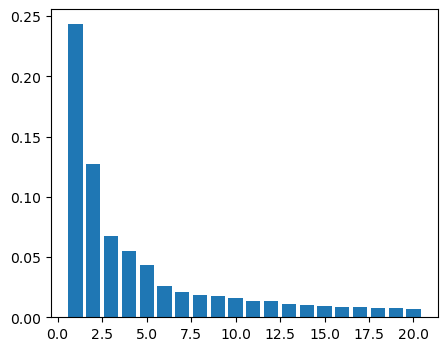

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [74]:
import numpy as np
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.24344894, 0.37101775, 0.43853667, 0.49313727, 0.5368376 ,
       0.56275636, 0.5839534 , 0.60275006, 0.6201653 , 0.6364581 ,
       0.6503197 , 0.66366243, 0.67459875, 0.68465024, 0.6943922 ,
       0.70321804, 0.7115202 , 0.7194621 , 0.7268564 , 0.7339363 ],
      dtype=float32)

In [75]:
X_pru_pca = pca.transform(X_test)
X_pru_pca.shape

(390, 20)

In [ ]:
from sklearn.model_selection import GridSearchCV
grilla = {'C': [1, 5, 10, 50],
               'gamma': [0.01, 0.1, 1, 10]}

svc = svm.SVC(kernel='rbf', C=1, gamma=10)
grid = GridSearchCV(svc, grilla)

grid.fit(X_train,y_train)
print(grid.best_params_)

In [54]:
from sklearn import svm
modelo = svm.SVC(kernel='rbf', C=10, gamma=0.01)

# Entrenamos el modelo usando el conjunto de entrenamiento
modelo.fit(X_ent_pca, y_train)

SVC(C=10, gamma=0.01)

In [55]:
# evaluamos el modelo
predicciones = modelo.predict(X_pru_pca)

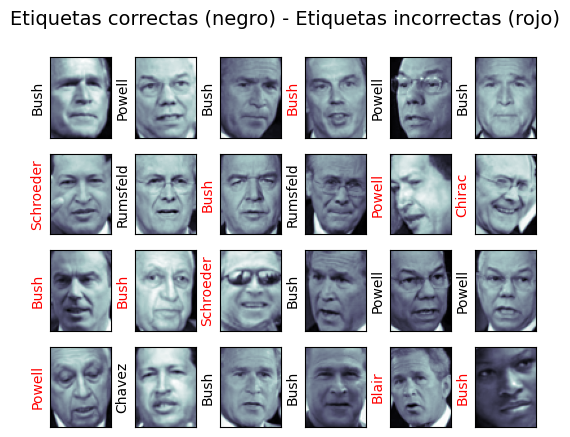

In [63]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
 axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
 axi.set(xticks=[], yticks=[])
 axi.set_ylabel(caras.target_names[predicciones[i]].split()[-1],
                color='black' if predicciones[i] == y_test[i] else 'red')
fig.suptitle('Etiquetas correctas (negro) - Etiquetas incorrectas (rojo)', size=14);

In [57]:
from sklearn.metrics import accuracy_score
print(f"Exactitud: {accuracy_score(y_test, predicciones):.2f}")

Exactitud: 0.62
